In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Import required library

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# Function to Load Dataset

In [3]:

def load_fish_dataset(dataset_path):
    images = []
    labels = []
    label_map = {}
    num_labels = 0

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".png"):
                # Load image
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                image = cv2.resize(image, (100, 100))  # Resize image if needed

                # Extract label from directory name
                label = os.path.basename(root)
                if label not in label_map:
                    label_map[label] = num_labels
                    num_labels += 1
                label_id = label_map[label]

                # Append image and label to lists
                images.append(image)
                labels.append(label_id)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_map


# Load Fish Dataset

In [4]:
dataset_path = "C:\\Users\\chait\\OneDrive\\Desktop\\archive (1)\\Fish_Dataset\\Fish_Dataset"
X, y, label_map = load_fish_dataset(dataset_path)

# Split the dataset into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(14400, 100, 100, 3)

# Train K-Nearest Neighbors (KNN) classifier

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train.reshape(len(X_train), -1), y_train)
knn_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test.reshape(len(X_test), -1)))
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

K-Nearest Neighbors Classifier Accuracy: 0.7866666666666666


# Make Confusion matrix and Classification report for KNN

In [7]:
knn_conf_matrix = confusion_matrix(y_test, knn_classifier.predict(X_test.reshape(len(X_test), -1)))
knn_classification_report = classification_report(y_test, knn_classifier.predict(X_test.reshape(len(X_test), -1)), target_names=label_map.keys())

print("Confusion Matrix (KNN):")
print(knn_conf_matrix)
print("\nClassification Report (KNN):")
print(knn_classification_report)

Confusion Matrix (KNN):
[[181   0   0   0   2   0   0   0   0   0   0   0   0   0   4   0   0   0]
 [  0 132   0   0   0   8   0  20   0   0   0   4   0  18   0  16   0   0]
 [  3   0 190   0   0   0   2   0   7   0   1   0   1   0   4   0   0   0]
 [  0   0   0 180   0   3   0   0   0  17   0   2   0   0   0   0   0   3]
 [  0   0   0   0 204   0   0   0   3   0   0   0   1   0   2   0   0   0]
 [  0  16   0   0   0 139   0  10   0   1   0  10   0   1   0  13   0   6]
 [  0   0   0   0   1   0 204   0   0   0   1   0   0   0   0   0   0   0]
 [  0  40   0   4   0  19   0 109   0   0   0  11   0  12   0  16   0   2]
 [  2   0   2   0   2   0   3   0 183   0   2   0   1   0   1   0   0   0]
 [  0   0   0  59   0   3   0   1   0 129   0   3   0   0   0   0   0  16]
 [ 15   0   9   0   2   0   5   0   5   0 146   0   1   0   3   0   4   0]
 [  0   8   0   1   0  13   0   9   0   0   0 157   0   0   0   5   0  11]
 [  6   0   0   0   2   0   3   0   0   0   0   0 183   0   0   0   0   0]
 

# Train Random Forest classifier

In [8]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train.reshape(len(X_train), -1), y_train)
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test.reshape(len(X_test), -1)))
print("Random Forest Classifier Accuracy:", rf_accuracy)


Random Forest Classifier Accuracy: 0.8505555555555555


# Make Confusion matrix and Classification report for Random Forest

In [9]:
rf_conf_matrix = confusion_matrix(y_test, rf_classifier.predict(X_test.reshape(len(X_test), -1)))
rf_classification_report = classification_report(y_test, rf_classifier.predict(X_test.reshape(len(X_test), -1)), target_names=label_map.keys())

print("\nConfusion Matrix (Random Forest):")
print(rf_conf_matrix)
print("\nClassification Report (Random Forest):")
print(rf_classification_report)


Confusion Matrix (Random Forest):
[[185   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0]
 [  0 136   0   0   0   3   0  16   0   0   0   3   0  20   0  20   0   0]
 [  2   0 195   0   1   0   2   0   0   0   3   0   1   0   1   0   3   0]
 [  0   0   0 169   0   2   0   0   0  18   0   2   0   0   0   0   0  14]
 [  0   0   2   0 208   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0   1   0 158   0   7   0   0   0  14   0   0   0   4   0   6]
 [  0   0   3   0   0   0 203   0   0   0   0   0   0   0   0   0   0   0]
 [  0  18   0   2   0  17   0 137   0   0   0   5   0   8   0  24   0   2]
 [  0   0   0   0   0   0   0   0 189   0   0   0   5   0   1   0   1   0]
 [  0   0   0  21   0   0   0   0   0 178   0   0   0   0   0   0   0  12]
 [  3   0   4   0   0   0   0   0   0   0 173   0   5   0   1   0   4   0]
 [  0   0   0   0   0  13   0  11   0   1   0 159   0   0   0   9   0  11]
 [  5   0   0   0   2   0   3   0   0   0   0   0 183   0   1   0

<Axes: >

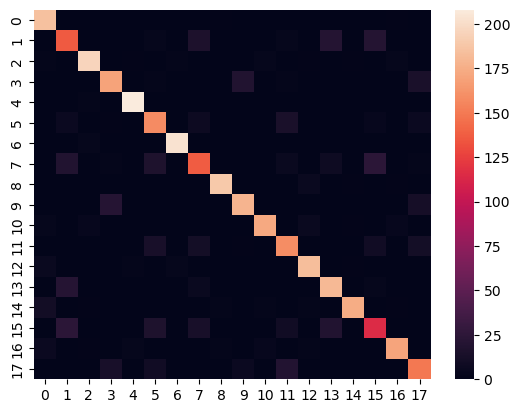

In [10]:
import seaborn as sns
sns.heatmap(rf_conf_matrix)

<Axes: >

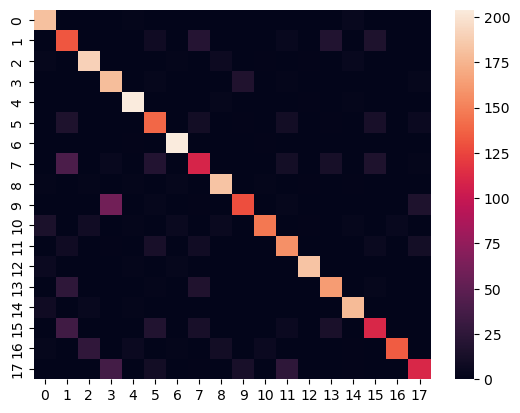

In [11]:
sns.heatmap(knn_conf_matrix)

# Choosing random image to use as instance for prediction

In [12]:
random_index = np.random.randint(len(X_test))
random_image = X_test[random_index]
random_label = y_test[random_index]


True Character Label: Red Mullet


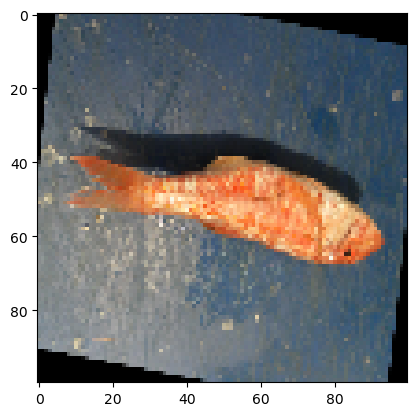

In [13]:
import matplotlib.pyplot as plt
plt.imshow(random_image)
print('True Character Label:',list(label_map.keys())[random_label])

# Predict Fish Types for randomly chosen images

In [14]:
predicted_character_knn = list(label_map.keys())[list(label_map.values()).index(knn_classifier.predict(random_image.reshape(1, -1))[0])]
predicted_character_rf = list(label_map.keys())[list(label_map.values()).index(rf_classifier.predict(random_image.reshape(1, -1))[0])]

print("True Character Label:", list(label_map.keys())[random_label])
print("Predicted Character (KNN):", predicted_character_knn)
print("Predicted Character (Random Forest):", predicted_character_rf)

True Character Label: Red Mullet
Predicted Character (KNN): Red Mullet
Predicted Character (Random Forest): Red Mullet
